In [23]:
from keras.datasets import reuters

 #가장많이 등장한 만개단어불러오기
(trainData, trainLabels),(testData,testLabels) = reuters.load_data(num_words=10000)

In [24]:
len(trainData) # 8982 훈련데이터
len(testData) #2246 테스트데이터

2246

In [25]:
# 데이터 확인
trainData[10]
trainLabels[10]

3

In [26]:
# 워드인덱스 확인
reuters.get_word_index() # 딕셔너리

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [27]:
# for문으로 워드인덱스 정제 (key,value) 순서바꾸기
word_index = reuters.get_word_index()
reverseWordindex = dict([(value,key) for (key,value) in word_index.items()])

In [28]:
# 문서 decode
decodedNews = " ".join([reverseWordindex.get(i-3,'?') for i in trainData[0]])
decodedNews

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [29]:
#데이터를 벡터로 변환
import numpy as np

def vec_seq(seq, dimension=10000):
    res=np.zeros((len(seq), dimension)) #(8982.10000)
    for i, sequence in enumerate(seq):
        res[i, sequence]=1
    return res
#     print(res.shape)
xTrain=vec_seq(trainData)
xTest=vec_seq(testData)

In [43]:
# 정답레이블 벡터화 (원핫인코딩)
def toOneHot(labels, dimension=46):
    res=np.zeros((len(labels), dimension)) #(10000, 46)
    for i, label in enumerate(labels):
        res[i, label]=1
    return res
# oneHotTrainLabels=toOneHot(trainLabels)    
# oneHotTestLabels=toOneHot(testLabels)

# 원핫인코딩 한번에 : to_categorical 메소드면 끝남.
from keras.utils.np_utils import to_categorical
oneHotTrainLabels = to_categorical(trainLabels)
oneHotTestLabels = to_categorical(testLabels)

In [ ]:
# 데이터셋 나누기
xTrain.shape
xVal = xTrain[:1000] # 검증셋
pxTrain = xTrain[1000:] # 트레이닝 셋 
yVal = oneHotTrainLabels[:1000] # 검증셋
pyTrain = oneHotTrainLabels[1000:] # 트레이닝 셋

In [32]:
from keras import models, layers

In [38]:
# 모델만들기
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = model.fit(pxTrain, pyTrain,
            epochs=30, batch_size=512,
            validation_data=(xVal,yVal))

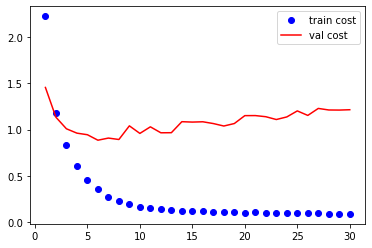

In [42]:
histDict = history.history
histDict.keys()
history.history['loss']

import matplotlib.pyplot as plt 
plt.plot(range(1, len(history.history['accuracy'])+1), history.history['loss'],'bo', label='train cost') # 1~30
plt.plot(range(1, len(history.history['accuracy'])+1), history.history['val_loss'],'r', label='val cost') # 1~30
plt.legend()

In [45]:
# 적정에폭 찾아서 모델다시돌리기

# 모델 만들기
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(pxTrain, pyTrain,
            epochs=6, batch_size=512,
            validation_data=(xVal,yVal))
            
# 모델평가
result = model.evaluate(xTest, oneHotTestLabels)
print(result)

Epoch 1/6
16/16 [==============================] - 1s 31ms/step - loss: 2.3049 - accuracy: 0.5639 - val_loss: 1.4285 - val_accuracy: 0.6800
Epoch 2/6
16/16 [==============================] - 0s 27ms/step - loss: 1.1637 - accuracy: 0.7543 - val_loss: 1.1395 - val_accuracy: 0.7390
Epoch 3/6
16/16 [==============================] - 0s 30ms/step - loss: 0.8280 - accuracy: 0.8230 - val_loss: 1.0008 - val_accuracy: 0.7800
Epoch 4/6
16/16 [==============================] - 1s 34ms/step - loss: 0.6205 - accuracy: 0.8692 - val_loss: 0.9271 - val_accuracy: 0.8070
Epoch 5/6
16/16 [==============================] - 0s 30ms/step - loss: 0.4625 - accuracy: 0.9039 - val_loss: 0.8773 - val_accuracy: 0.8140
Epoch 6/6
71/71 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.7867
[0.9756314754486084, 0.7867319583892822]


In [58]:
# 만든 모델로 예측
predictions = model.predict(xTest)
np.argmax(predictions[0]) # 가장 높은 확률을 가지는 문서분류인덱스

4

In [57]:
# 예측결과의 생김새
model.predict(xTest).shape # (2246,46)
model.predict(xTest)[0] # array
model.predict(xTest)[0].sum() # 1

1.0000001